In [1]:
import rdkit
import pandas as pd
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import os
os.chdir('/Users/fenn/Documents/PhDProjects/MCB/MachineLearning/model_DeepLearning/dataset1')
os.listdir()

['gene_attribute_edges.txt',
 'processing_scripts',
 'gene_set_library_up_crisp.gmt',
 'processing_scripts.tar',
 'gene_set_library_dn_crisp.gmt',
 'attribute_set_library_dn_crisp.gmt',
 'gene_attribute_matrix.txt',
 'attribute_set_library_up_crisp.gmt']

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

2024-09-02 17:52:47.720748: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
os.chdir('/Users/fenn/Documents/PhDProjects/MCB/MachineLearning/model_DeepLearning/gene-small molecule perturbation associations')
os.listdir()

['gene_attribute_edges.txt',
 'OneHot_Drug.csv',
 'gene_set_library_up_crisp.gmt',
 'drug_ID_OneHot_len.csv',
 'drugs_875_meta.tsv',
 'Y_874_597.csv',
 'gene_set_library_dn_crisp.gmt',
 'X_874_114_53.csv',
 'Y_PCA_597.csv',
 'Drug_ID_SMILE.csv',
 'gene_list_terms.txt']

In [62]:
geneTerms = []
for i in list(gene_sets.values()):
    geneTerms.append(list(*i.values()))
geneTerms

[['AASDH',
  'ABAT',
  'ACTBL2',
  'ACTR3B',
  'ADPRH',
  'AGAP2',
  'ALG6',
  'ANKRD10',
  'ARHGAP42',
  'ARHGAP44',
  'AZGP1',
  'B3GNT2',
  'BBS1',
  'C6ORF47',
  'CAPN15',
  'CDK11A',
  'CELSR2',
  'CHD6',
  'CLCN3',
  'CMC1',
  'COMMD7',
  'CREG1',
  'CSGALNACT2',
  'CTSH',
  'DEPDC1B',
  'DTX2',
  'DTX3L',
  'DUSP6',
  'ELAC1',
  'EMP3',
  'EPHA1',
  'FGD1',
  'FUT11',
  'HPCAL4',
  'HPS3',
  'IFNGR1',
  'IQGAP2',
  'KDM4C',
  'KIAA0100',
  'KIAA0586',
  'KIAA2026',
  'KMT2B',
  'LAMA1',
  'LAMA3',
  'LAMTOR2',
  'LATS2',
  'MADD',
  'MATR3',
  'MERTK',
  'MT-ATP6',
  'MT-CO1',
  'MTUS2',
  'MYT1',
  'NALCN',
  'NEIL1',
  'NEK4',
  'NUDT18',
  'OGFRL1',
  'PDCD4',
  'PDLIM3',
  'PIP',
  'PLEKHA4',
  'POU2F1',
  'PRPF40B',
  'PTPRE',
  'PUM1',
  'RBKS',
  'RBSN',
  'RINL',
  'RPUSD3',
  'SERPINC1',
  'SIK2',
  'SLC25A36',
  'SLC26A2',
  'SLF2',
  'SNCA',
  'SOCS2',
  'SREBF2',
  'STK11',
  'STX1A',
  'TMCO3',
  'TMEM246',
  'TMEM260',
  'TPM1',
  'TRAM2',
  'TRO',
  'TTLL4',
  'UB

In [68]:
# 转换 'Genes' 列为逗号分隔的字符串
df['Genes'] = df['Genes'].apply(lambda genes: ', '.join(genes))

# 输出结果
print(df)

                       Drug                                         Genes
0  (4-Chlorobenzyl)pyridine     AASDH, ABAT, ACTBL2, ACTR3B, ADPRH, AGAP2
1                  (RS)-PPG       ABCB1, ABCC9, ABHD15, AKNA, ALG3, AP5Z1
2          (S)-(-)-Pindolol  AASDH, ABHD4, ABITRAM, ADGRG6, ADGRV1, AGAP2


In [76]:
import pubchempy as pcp

# 函数：使用 PubChem 查询化合物名称对应的 SMILES
def get_smiles(drug_name):
    try:
        compound = pcp.get_compounds(drug_name, 'name')
        if compound:
            return compound[0].canonical_smiles
        else:
            return None
    except Exception as e:
        print(f"Error retrieving SMILES for {drug_name}: {e}")
        return None

In [79]:
import pubchempy as pcp

# 函数：通过药物名称获取 SMILES
def get_smiles(drug_name):
    try:
        # 使用 PubChemPy 获取化合物对象列表
        compound = pcp.get_compounds(drug_name, 'name')
        if compound:
            # 返回第一个化合物的 SMILES 字符串
            return compound[0].canonical_smiles
        else:
            return None
    except Exception as e:
        print(f"Error retrieving SMILES for {drug_name}: {e}")
        return None

# 示例：获取某个化合物的 SMILES
drug_name = "(4-Chlorobenzyl)pyridine"
smiles = get_smiles(drug_name)

if smiles:
    print(f"The SMILES for {drug_name} is: {smiles}")
else:
    print(f"SMILES not found for {drug_name}.")


SMILES not found for (4-Chlorobenzyl)pyridine.


In [86]:
import pubchempy as pcp

# 函数：通过药物名称获取 SMILES，支持批量处理
def get_smiles_for_drugs(drug_names):
    smiles_dict = {}
    for drug_name in drug_names:
        try:
            # 使用 PubChemPy 查询化合物
            compound = pcp.get_compounds(drug_name, 'name')
            if compound:
                # 获得 SMILES 并存储在字典中
                smiles_dict[drug_name] = compound[0].canonical_smiles
            else:
                smiles_dict[drug_name] = None
        except Exception as e:
            print(f"Error retrieving SMILES for {drug_name}: {e}")
            smiles_dict[drug_name] = None
    return smiles_dict

# 示例药物名称列表
drug_names = [
    "(4-Chlorobenzyl)pyridine", 
    "(RS)-PPG", 
    "(S)-(-)-Pindolol"
]

# 获取 SMILES
smiles_results = get_smiles_for_drugs(drug_names)

# 打印结果
for drug, smiles in smiles_results.items():
    if smiles:
        print(f"The SMILES for {drug} is: {smiles}")
    else:
        print(f"SMILES not found for {drug}.")


SMILES not found for (4-Chlorobenzyl)pyridine.
The SMILES for (RS)-PPG is: C1=CC(=CC=C1C(C(=O)O)N)P(=O)(O)O
The SMILES for (S)-(-)-Pindolol is: CC(C)NCC(COC1=CC=CC2=C1C=CN2)O


In [95]:
drugID = pd.read_table('gene_attribute_edges.txt')
drugID = drugID.drop_duplicates(subset=['Drug']).reset_index(drop=True)
drugID = drugID.loc[:,['Drug', 'Pubchem ID']]
drugID

Drug  Pubchem ID
0          Atglistatin    71699712
1          TCS ERK 11e    11634725
2           Pictilisib    17755052
3           Zebularine      100016
4             ONX 0914    23642227
..                 ...         ...
869      (S)-Zopiclone      969472
870         Roxatidine       91276
871  Glycyrrhizic acid       14982
872        Laropiprant     9867642
873           GW311616     9800961

[874 rows x 2 columns]

In [98]:
# 函数：根据 PubChem ID 获取 SMILES
def get_smiles_by_cid(cid):
    try:
        compound = pcp.Compound.from_cid(cid)
        return compound.canonical_smiles
    except Exception as e:
        print(f"Error retrieving SMILES for CID {cid}: {e}")
        return None
    
drugID['SMILE'] = drugID['Pubchem ID'].apply(get_smiles_by_cid)
drugID

Drug  Pubchem ID  \
0          Atglistatin    71699712   
1          TCS ERK 11e    11634725   
2           Pictilisib    17755052   
3           Zebularine      100016   
4             ONX 0914    23642227   
..                 ...         ...   
869      (S)-Zopiclone      969472   
870         Roxatidine       91276   
871  Glycyrrhizic acid       14982   
872        Laropiprant     9867642   
873           GW311616     9800961   

                                                 SMILE  
0           CN(C)C1=CC=C(C=C1)C2=CC(=CC=C2)NC(=O)N(C)C  
1    CC1=CN=C(N=C1C2=CNC(=C2)C(=O)NC(CO)C3=CC(=CC=C...  
2    CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...  
3                    C1=CN(C(=O)N=C1)C2C(C(C(O2)CO)O)O  
4    CC(C(=O)NC(CC1=CC=C(C=C1)OC)C(=O)NC(CC2=CC=CC=...  
..                                                 ...  
869  CN1CCN(CC1)C(=O)OC2C3=NC=CN=C3C(=O)N2C4=NC=C(C...  
870               C1CCN(CC1)CC2=CC(=CC=C2)OCCCNC(=O)CO  
871  CC1(C2CCC3(C(C2(CCC1OC4C(C(C(C(O4)C(=O)O)O)O)O...  
872  CS(=O)(=O)C1=CC(=CC2=C1N(C3=C2CCC3CC(=O)O)CC4=...  
873  CC(C)C1C2C(CCN2C(=O)C=CCN3CCCCC3)N(C1=O)S(=O)(...  

[874 rows x 3 columns]

In [99]:
drugID.to_csv('Drug_ID_SMILE.csv', index=None)

In [102]:
drugID.sort_values('SMILE').reset_index(drop=True)

Drug  Pubchem ID  \
0                  HA130    46911532   
1    p-Tolylboronic acid       79799   
2     Phenylboronic acid       66827   
3                    BEC     9877608   
4               Icotinib    22024915   
..                   ...         ...   
869           Pictilisib    17755052   
870         Sulforaphane        5350   
871      Triclabendazole       50248   
872           Mildronate      123868   
873     Methylnaltrexone     5361918   

                                                 SMILE  
0    B(C1=CC(=CC=C1)COC2=CC=C(C=C2)C=C3C(=O)N(C(=O)...  
1                                B(C1=CC=C(C=C1)C)(O)O  
2                                   B(C1=CC=CC=C1)(O)O  
3                                B(CCSCC(C(=O)O)N)(O)O  
4    C#CC1=CC(=CC=C1)NC2=NC=NC3=CC4=C(C=C32)OCCOCCO...  
..                                                 ...  
869  CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...  
870                                    CS(=O)CCCCN=C=S  
871      CSC1=NC2=CC(=C(C=C2N1)Cl)OC3=C(C(=CC=C3)Cl)Cl  
872                            C[N+](C)(C)NCCC(=O)[O-]  
873  C[N+]1(CCC23C4C(=O)CCC2(C1CC5=C3C(=C(C=C5)O)O4...  

[874 rows x 3 columns]

In [113]:
pd.set_option('display.max_columns', None)

In [117]:
# 获取一组唯一的原子序数来定义 one-hot 编码
def get_unique_atomic_numbers(smiles_list):
    atomic_numbers = set()
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            for atom in mol.GetAtoms():
                atomic_numbers.add(atom.GetAtomicNum())
    return sorted(list(atomic_numbers))

# 从SMILES生成one-hot向量
def smiles_to_one_hot(smiles, atom_list):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    # 初始化one-hot矩阵
    one_hot_matrix = np.zeros((mol.GetNumAtoms(), len(atom_list)), dtype=int)
    # 填充one-hot矩阵
    for i, atom in enumerate(mol.GetAtoms()):
        index = atom_list.index(atom.GetAtomicNum())
        one_hot_matrix[i, index] = 1
    return one_hot_matrix

# 获取所有SMILES中的唯一原子序数

df = drugID
unique_atomic_numbers = get_unique_atomic_numbers(df['SMILE'])

# 为每个SMILES字符串生成one-hot矩阵
df['One-hot'] = df['SMILE'].apply(lambda x: smiles_to_one_hot(x, unique_atomic_numbers))
df

Drug  Pubchem ID  \
0          Atglistatin    71699712   
1          TCS ERK 11e    11634725   
2           Pictilisib    17755052   
3           Zebularine      100016   
4             ONX 0914    23642227   
..                 ...         ...   
869      (S)-Zopiclone      969472   
870         Roxatidine       91276   
871  Glycyrrhizic acid       14982   
872        Laropiprant     9867642   
873           GW311616     9800961   

                                                 SMILE  \
0           CN(C)C1=CC=C(C=C1)C2=CC(=CC=C2)NC(=O)N(C)C   
1    CC1=CN=C(N=C1C2=CNC(=C2)C(=O)NC(CO)C3=CC(=CC=C...   
2    CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...   
3                    C1=CN(C(=O)N=C1)C2C(C(C(O2)CO)O)O   
4    CC(C(=O)NC(CC1=CC=C(C=C1)OC)C(=O)NC(CC2=CC=CC=...   
..                                                 ...   
869  CN1CCN(CC1)C(=O)OC2C3=NC=CN=C3C(=O)N2C4=NC=C(C...   
870               C1CCN(CC1)CC2=CC(=CC=C2)OCCCNC(=O)CO   
871  CC1(C2CCC3(C(C2(CCC1OC4C(C(C(C(O4)C(=O)O)O)O)O...   
872  CS(=O)(=O)C1=CC(=CC2=C1N(C3=C2CCC3CC(=O)O)CC4=...   
873  CC(C)C1C2C(CCN2C(=O)C=CCN3CCCCC3)N(C1=O)S(=O)(...   

                                               One-hot  
0    [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, ...  
1    [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, ...  
2    [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, ...  
3    [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, ...  
4    [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, ...  
..                                                 ...  
869  [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, ...  
870  [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, ...  
871  [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, ...  
872  [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, ...  
873  [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, ...  

[874 rows x 4 columns]

In [205]:
df.to_csv('drug_ID_OneHot_len.csv', index=None)

In [208]:
import numpy as np
import pandas as pd

# 示例：创建 DataFrame，包括药物的 one-hot 编码和目标基因列表 (Y)
# 假设 `X` 是 one-hot 编码数组，`Y` 是目标基因的表示（可以是二进制表示或其他形式）
# X shape: (874, n_features)  例如 874个药物和n个特征
# Y shape: (874, n_classes)  例如 874个药物及其对应的目标基因（可以是DEG或者分类）

# 生成示例数据
num_samples = 874
num_features = 10  # 假设属性特征数量，例如化学分子的原子特征
num_classes = 5    # 假设有5个基因类别或目标类别

# 随机生成示例数据
X = np.random.randint(2, size=(num_samples, num_features))  # One-hot 编码
Y = np.random.randint(2, size=(num_samples, num_classes))    # 目标基因的二进制表示

# 创建 DataFrame 示例 (可选)
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(num_features)])
df['Target_Genes'] = list(Y)
df

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0            1          1          1          1          1          0   
1            1          1          0          0          0          0   
2            1          0          0          1          0          1   
3            1          0          0          0          0          0   
4            1          0          1          0          0          0   
..         ...        ...        ...        ...        ...        ...   
869          1          1          0          1          1          1   
870          1          1          1          1          1          0   
871          1          1          1          0          0          1   
872          1          0          0          0          1          0   
873          0          0          1          0          0          1   

     Feature_7  Feature_8  Feature_9  Feature_10     Target_Genes  
0            0          0          0           1  [0, 1, 0, 1, 0]  
1            1          1          0           0  [1, 0, 1, 1, 0]  
2            1          1          1           0  [1, 1, 1, 1, 0]  
3            1          0          0           1  [1, 1, 1, 1, 1]  
4            0          0          1           1  [0, 0, 0, 0, 1]  
..         ...        ...        ...         ...              ...  
869          0          0          1           1  [0, 1, 0, 1, 0]  
870          1          1          0           0  [1, 0, 1, 1, 1]  
871          0          1          1           1  [1, 0, 1, 1, 0]  
872          1          0          0           0  [0, 0, 1, 1, 0]  
873          1          0          0           1  [0, 1, 1, 0, 1]  

[874 rows x 11 columns]

In [230]:
# 创建一个随机的三维数组
X = np.random.randint(2, size=(num_samples, 1, num_features))  # 874 samples, 1 row, 10 features

# 展平 X 为二维数组以便于这类模型
X_flat = X.reshape(num_samples, num_features)  # 变为 (874, 10)
X_flat

array([[0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 1, 1, 0, 1, 1, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 1, 0],
       [1, 0, 1, 1, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 1, 1, 0],
       [1, 0, 0, 1, 1, 0, 0, 1, 1, 0],
       [1, 0, 1, 0, 1, 1, 1, 1, 1, 0],
       [1, 0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 1, 1, 1, 0, 1],
       [0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 1, 1, 1, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 1, 1, 1, 0, 1, 1, 1],
       [0, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 1, 1, 0, 0, 0, 1, 0, 1, 1],
       [1, 0, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 1, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 0,

In [211]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 定义模型
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(num_features,)),  # 输入层
    layers.Dense(32, activation='relu'),                               # 隐藏层 1
    layers.Dense(16, activation='relu'),                               # 隐藏层 2
    layers.Dense(num_classes, activation='sigmoid')                   # 输出层（或 softmax 对于多类分类）
])

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [224]:
import numpy as np
import pandas as pd

# 假设变量 X（one-hot 特征）和 Y（目标基因的二进制表示）
num_samples = 874
num_features = 10  # 假设每个药物有10个特征
num_genes = 7750   # 假设需要预测的目标基因数量

# 生成示例数据（随机生成的特征和标签）
X = np.random.randint(2, size=(num_samples, num_features))  # One-hot 编码特征（0和1）
Y = np.random.randint(2, size=(num_samples, num_genes))     # 目标基因的二进制标签

# 创建 DataFrame 示例（可选）
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(num_features)])


In [213]:
# 训练模型
history = model.fit(X, Y, epochs=50, batch_size=32, validation_split=0.2)  # 分割20%作为验证集


Epoch 1/50
22/22 [==============================] - 1s 8ms/step - loss: 0.6958 - accuracy: 0.2160 - val_loss: 0.6941 - val_accuracy: 0.1771
Epoch 2/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.1645 - val_loss: 0.6940 - val_accuracy: 0.1371
Epoch 3/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.1860 - val_loss: 0.6939 - val_accuracy: 0.1486
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.2189 - val_loss: 0.6944 - val_accuracy: 0.1657
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.2089 - val_loss: 0.6943 - val_accuracy: 0.1714
Epoch 6/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.1946 - val_loss: 0.6955 - val_accuracy: 0.1600
Epoch 7/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.2446 - val_loss: 0.6956 - val_accuracy: 0.1714
Epoch 8/50
22/22 [==

Model Loss: 0.6371
Model Accuracy: 0.3581


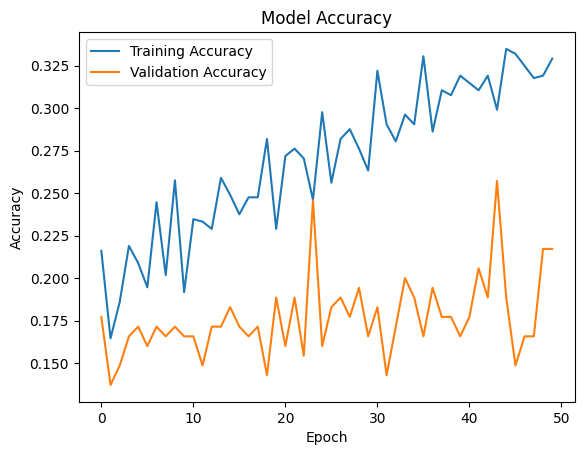

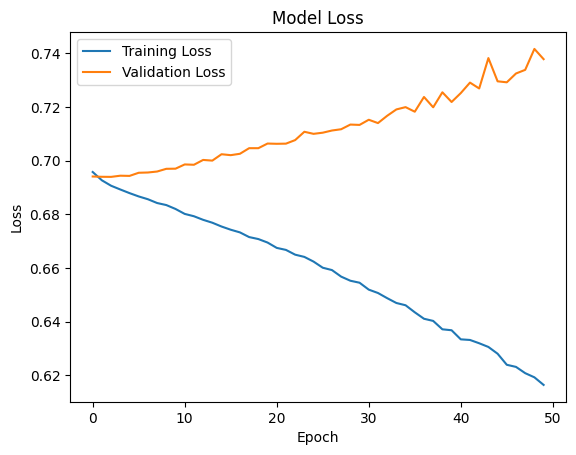

In [214]:
# 验证模型
loss, accuracy = model.evaluate(X, Y, verbose=0)
print(f"Model Loss: {loss:.4f}")
print(f"Model Accuracy: {accuracy:.4f}")

# 绘制训练过程中的损失和准确性（可选）
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [4]:
import numpy as np
import pandas as pd

# 示例：创建 DataFrame，包括药物名称和相应的 One-hot 编码
data = {
    'Drug': ['Drug1', 'Drug2', 'Drug3', 'Drug4', 'Drug5'],
    'OneHot': [
        np.array([0, 0, 0, 1, 0, 0, 1, 0]),  # 8个特征
        np.array([0, 0, 1, 0]),               # 4个特征
        np.array([0, 1, 0, 0]),               # 4个特征
        np.array([1, 0, 0, 0]),               # 4个特征
        np.array([0, 0, 0, 1])                # 4个特征
    ]
}

df = pd.DataFrame(data)

# 最大特征长度
max_length = max(len(arr) for arr in df['OneHot'])

max_length


8

In [241]:
# 初始化统一长度的 one-hot 特征矩阵
X = np.zeros((len(df), max_length))

# 填充各个 One-hot 数组
for i, one_hot in enumerate(df['OneHot']):
    X[i, :len(one_hot)] = one_hot  # 将每个 One-hot 数组赋值到 X 中

# 打印结果
print("Feature matrix (X):")
print(X)
print("Shape of X:", X.shape)  # 检查最终形状


Feature matrix (X):
[[0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]
Shape of X: (5, 8)


In [238]:
def flatten_one_hot(one_hot_array):
    return np.concatenate(one_hot_array).flatten()

# 将 One-hot 列转换为输入特征矩阵
X = np.array([flatten_one_hot(one_hot) for one_hot in df['OneHot']])


X

/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_96684/4194271972.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([flatten_one_hot(one_hot) for one_hot in df['OneHot']])


array([array([0, 0, 0, 1, 0, 0, 1, 0]), array([0, 0, 1, 0]),
       array([0, 1, 0, 0]), array([1, 0, 0, 0]), array([0, 0, 0, 1])],
      dtype=object)

In [232]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

# SMILES 转换为分子对象
smiles = 'C1CCN(CC1)CC2=CC(=CC=C2)OCCCNC(=O)CO'
mol = Chem.MolFromSmiles(smiles)

# 生成 One-Hot 编码
def atom_features(atom):
    # 这是一个简单的 One-Hot 编码示例
    return np.array([
        int(atom.GetAtomicNum() == 6),  # Carbon
        int(atom.GetAtomicNum() == 7),  # Nitrogen
        int(atom.GetAtomicNum() == 8),  # Oxygen
        # 继续为其他原子类型添加
    ])

# 对分子中的每个原子进行 One-Hot 编码
one_hot_matrix = np.array([atom_features(atom) for atom in mol.GetAtoms()])

print(one_hot_matrix)


[[1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]]


In [160]:
import pandas as pd
import numpy as np
from rdkit import Chem

df=drugID.iloc[:,:3]

# 获取一组唯一的原子序数
def get_unique_atomic_numbers(smiles_list):
    atomic_numbers = set()
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            for atom in mol.GetAtoms():
                atomic_numbers.add(atom.GetAtomicNum())
    return sorted(list(atomic_numbers))

# 将 SMILES 转换为扁平向量
def smiles_to_flat_vector(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return [atom.GetAtomicNum() for atom in mol.GetAtoms()]

# 将扁平向量转换为 One-hot 矩阵
def flat_vector_to_one_hot(vector, max_atomic_number):
    one_hot_matrix = np.zeros((len(vector), max_atomic_number), dtype=int)
    for idx, atomic_number in enumerate(vector):
        # 确保原子序数在指定范围内
        if atomic_number <= max_atomic_number:
            one_hot_matrix[idx, atomic_number - 1] = 1
    return one_hot_matrix

# 获取所有唯一原子序数
unique_atomic_numbers = get_unique_atomic_numbers(df['SMILE'])
max_atomic_number = max(unique_atomic_numbers)  # 自动确定最大原子序数

# 为每个 SMILES 字符串生成扁平向量和 One-hot 编码
df['Flat Vector'] = df['SMILE'].apply(smiles_to_flat_vector)
df['OneHot'] = df['Flat Vector'].apply(lambda x: flat_vector_to_one_hot(x, max_atomic_number) if x is not None else None)
# 计算每个 One-hot 矩阵的长度
df['OneHot Length'] = df['OneHot'].apply(len)
# 找到最大长度的索引
max_length_index = df['OneHot Length'].idxmax()
# 获取对应的 Drug 和 One-hot 长度
longest_drug = df.loc[max_length_index, 'Drug']
longest_length = df.loc[max_length_index, 'OneHot Length']

print(f"The drug with the longest one-hot matrix is: {longest_drug} with length: {longest_length}")

df

The drug with the longest one-hot matrix is: Bombesin with length: 114


Drug  Pubchem ID  \
0          Atglistatin    71699712   
1          TCS ERK 11e    11634725   
2           Pictilisib    17755052   
3           Zebularine      100016   
4             ONX 0914    23642227   
..                 ...         ...   
869      (S)-Zopiclone      969472   
870         Roxatidine       91276   
871  Glycyrrhizic acid       14982   
872        Laropiprant     9867642   
873           GW311616     9800961   

                                                 SMILE  \
0           CN(C)C1=CC=C(C=C1)C2=CC(=CC=C2)NC(=O)N(C)C   
1    CC1=CN=C(N=C1C2=CNC(=C2)C(=O)NC(CO)C3=CC(=CC=C...   
2    CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...   
3                    C1=CN(C(=O)N=C1)C2C(C(C(O2)CO)O)O   
4    CC(C(=O)NC(CC1=CC=C(C=C1)OC)C(=O)NC(CC2=CC=CC=...   
..                                                 ...   
869  CN1CCN(CC1)C(=O)OC2C3=NC=CN=C3C(=O)N2C4=NC=C(C...   
870               C1CCN(CC1)CC2=CC(=CC=C2)OCCCNC(=O)CO   
871  CC1(C2CCC3(C(C2(CCC1OC4C(C(C(C(O4)C(=O)O)O)O)O...   
872  CS(=O)(=O)C1=CC(=CC2=C1N(C3=C2CCC3CC(=O)O)CC4=...   
873  CC(C)C1C2C(CCN2C(=O)C=CCN3CCCCC3)N(C1=O)S(=O)(...   

                                           Flat Vector  \
0    [6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...   
1    [6, 6, 6, 7, 6, 7, 6, 6, 6, 7, 6, 6, 6, 8, 7, ...   
2    [6, 16, 8, 8, 7, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6,...   
3     [6, 6, 7, 6, 8, 7, 6, 6, 6, 6, 6, 8, 6, 8, 8, 8]   
4    [6, 6, 6, 8, 7, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, ...   
..                                                 ...   
869  [6, 7, 6, 6, 7, 6, 6, 6, 8, 8, 6, 6, 7, 6, 6, ...   
870  [6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, ...   
871  [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, ...   
872  [6, 16, 8, 8, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6,...   
873  [6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 8, 6, 6, 6, 7, ...   

                                                OneHot  OneHot Length  
0    [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...             21  
1    [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...             34  
2    [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...             35  
3    [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...             16  
4    [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...             42  
..                                                 ...            ...  
869  [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...             27  
870  [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...             22  
871  [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...             58  
872  [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...             29  
873  [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...             27  

[874 rows x 6 columns]

In [158]:
df[df['SMILE'].str.contains('I', flags=re.IGNORECASE)]

Drug  Pubchem ID  \
481        AM 630     4302963   
506  2-Cl-IB-MECA     3035850   
757            T3        5920   

                                                 SMILE  \
481  CC1=C(C2=C(N1CCN3CCOCC3)C=C(C=C2)I)C(=O)C4=CC=...   
506  CNC(=O)C1C(C(C(O1)N2C=NC3=C(N=C(N=C32)Cl)NCC4=...   
757     C1=CC(=C(C=C1OC2=C(C=C(C=C2I)CC(C(=O)O)N)I)I)O   

                                           Flat Vector  \
481  [6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 8, 6, 6, 6, ...   
506  [6, 7, 6, 8, 6, 6, 6, 6, 8, 7, 6, 7, 6, 6, 7, ...   
757  [6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 53, 6,...   

                                                OneHot  
481  [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
506  [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
757  [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...

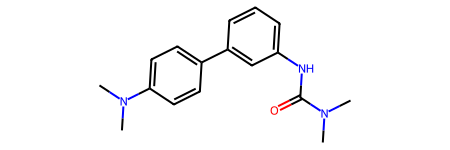

In [3]:
from rdkit import Chem

# 函数：将 SMILES 转化为分子对象
def smiles_to_mol(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError(f"Invalid SMILES: {smiles}")
    return mol

# 示例 SMILES
smiles = "CN(C)C1=CC=C(C=C1)C2=CC(=CC=C2)NC(=O)N(C)C"
mol = smiles_to_mol(smiles)

mol

In [105]:
def mol_to_flat_vector(mol):
    atom_features = []
    for atom in mol.GetAtoms():
        atom_features.append(atom.GetAtomicNum())
    return atom_features

# 转化为扁平向量
flat_vector = mol_to_flat_vector(mol)
print(flat_vector)


[6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 8, 7, 6, 6]


In [106]:
import numpy as np

def flat_vector_to_one_hot(vector, max_atomic_number):
    # 创建一个全零矩阵，形状为：(元素数，最大原子序数)
    one_hot_matrix = np.zeros((len(vector), max_atomic_number))
    
    for idx, atomic_number in enumerate(vector):
        if atomic_number <= max_atomic_number:
            one_hot_matrix[idx, atomic_number - 1] = 1  # 将对应原子位置置为1（原子序数从1开始）

    return one_hot_matrix

# 使用假设最大原子序数 10（实际上可以扩展）
max_atomic_number = 10
one_hot_matrix = flat_vector_to_one_hot(flat_vector, max_atomic_number)
print(one_hot_matrix)


[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [96]:
import pubchempy as pcp

# 函数：通过 PubChem CID 获取 SMILES
def get_smiles_by_cid(cid):
    try:
        # 使用 PubChemPy 查询化合物
        compound = pcp.Compound.from_cid(cid)
        return compound.canonical_smiles
    except Exception as e:
        print(f"Error retrieving SMILES for CID {cid}: {e}")
        return None

# 示例 CID 列表
cid_list = [71699712, 11634725, 9800961]  # 这些是任意的例子 CID

# 获取 SMILES
smiles_results = {cid: get_smiles_by_cid(cid) for cid in cid_list}

# 打印结果
for cid, smiles in smiles_results.items():
    if smiles:
        print(f"The SMILES for CID {cid} is: {smiles}")
    else:
        print(f"SMILES not found for CID {cid}.")


The SMILES for CID 71699712 is: CN(C)C1=CC=C(C=C1)C2=CC(=CC=C2)NC(=O)N(C)C
The SMILES for CID 11634725 is: CC1=CN=C(N=C1C2=CNC(=C2)C(=O)NC(CO)C3=CC(=CC=C3)Cl)NC4=C(C=C(C=C4)F)Cl
The SMILES for CID 9800961 is: CC(C)C1C2C(CCN2C(=O)C=CCN3CCCCC3)N(C1=O)S(=O)(=O)C


In [75]:
df = Drug_up
# 创建一个新的 "SMILES" 列
df['SMILES'] = df['Drug'].apply(get_smiles)
df

Drug  \
0    (4-Chlorobenzyl)pyridine   
1                    (RS)-PPG   
2            (S)-(-)-Pindolol   
3              (S)-Selisistat   
4               (S)-Zopiclone   
..                        ...   
869              kb NB 142-70   
870                     ko143   
871                     mL167   
872                     mL347   
873       p-Tolylboronic acid   

                                                 Genes  
0    AASDH, ABAT, ACTBL2, ACTR3B, ADPRH, AGAP2, ALG...  
1    ABCB1, ABCC9, ABHD15, AKNA, ALG3, AP5Z1, ASXL2...  
2    AASDH, ABHD4, ABITRAM, ADGRG6, ADGRV1, AGAP2, ...  
3    ABCC5, ADGRF1, ALDH1A2, ALDH1A3, ALG3, ALKBH5,...  
4    ACSL6, ACTBL2, ACTN4, ADGRV1, AP5M1, ATXN7L2, ...  
..                                                 ...  
869  AAR2, AEN, ANKRD10, ARHGEF28, ASB6, ATF3, C1QT...  
870  AAGAB, AAMDC, ABAT, ABHD2, ABHD3, ADGRG1, ADIR...  
871  ACTR1B, ALDOA, ALKBH7, ANKRD39, ANXA2, APBB1, ...  
872  ABHD2, ANKH, APOB, APOE, ARG2, ARMC4, BRD9, BT...  
873  ADIRF, ALDOC, ANGPTL4, ARID5B, ATP5F1D, ATP5PF...  

[874 rows x 2 columns]

In [69]:
Drug_up = pd.DataFrame({'Drug': gene_sets.keys(), 'Genes': geneTerms})
Drug_up['Genes'] = Drug_up['Genes'].apply(lambda genes: ', '.join(genes))
Drug_up.head(50)

Drug  \
0        (4-Chlorobenzyl)pyridine   
1                        (RS)-PPG   
2                (S)-(-)-Pindolol   
3                  (S)-Selisistat   
4                   (S)-Zopiclone   
5                      (Z)-Pugnac   
6                        1,4-DHNA   
7                        10074-G5   
8                2,2'-Biquinoline   
9              2,4-Dichlorophenol   
10     2,6-Dichlorophenethylamine   
11          2-Bromophenethylamine   
12                   2-Cl-IB-MECA   
13                         2-PMPA   
14     3,5-Dichlorosalicylic acid   
15  3-Benzotriazol-propionic acid   
16             3-Benzyloxyaniline   
17            3-Deazaneplanocin A   
18               3-Hydroxyflavone   
19            4,4'-Dichlorobenzil   
20           4,4'-Dimethoxybenzil   
21          4-Aminobenzohydrazide   
22               4-Benzylpyridine   
23          4-Methoxybenzoic acid   
24              4-Methylhistamine   
25              4-Nitropiazthiole   
26                         4EGI-1   
27                          4mu8C   
28                5-Ethynyluracil   
29               5-Hydroxyflavone   
30                5-R-Rivaroxaban   
31                6-Aminochrysene   
32               6-Mercaptopurine   
33                      6603-0104   
34                     7,3,4-THIF   
35           7,8-Dihydroxyflavone   
36             7-Hydroxycoumarine   
37            9-Aminocamptothecin   
38                         A 1120   
39                       A 438079   
40                       A 803467   
41                       A 922500   
42                       A 967079   
43                       A-317491   
44                        AA92593   
45                         ABL127   
46                        ABT-199   
47                        ABT-737   
48                        AC-7954   
49                            ACA   

                                                Genes  
0   AASDH, ABAT, ACTBL2, ACTR3B, ADPRH, AGAP2, ALG...  
1   ABCB1, ABCC9, ABHD15, AKNA, ALG3, AP5Z1, ASXL2...  
2   AASDH, ABHD4, ABITRAM, ADGRG6, ADGRV1, AGAP2, ...  
3   ABCC5, ADGRF1, ALDH1A2, ALDH1A3, ALG3, ALKBH5,...  
4   ACSL6, ACTBL2, ACTN4, ADGRV1, AP5M1, ATXN7L2, ...  
5   ABCB4, ACTBL2, ADCY5, ALDOA, ANGPTL4, ARMC7, B...  
6   ABCB6, ABTB1, ADGRF1, ADM, ALAS1, ALDH1A2, ALD...  
7   ABHD15, ABRACL, AKAP12, ANKRD40, ARL6IP6, ASAP...  
8   ABCC5, ABHD13, ACTBL2, ACTN3, ADGRF1, ALDH1A2,...  
9   ABHD13, ABHD17B, AGTPBP1, ALMS1, ANAPC11, ARMC...  
10  AEN, AMD1, ANKRD13B, ANKRD46, AP5S1, ARL4A, AR...  
11  ACD, AFG1L, ARAP2, ATMIN, ATXN7L2, BAHCC1, BCO...  
12  ABHD2, AKR1C3, ALDH3B1, ALOXE3, ANK2, ANKRD13D...  
13  ABHD17B, ABITRAM, ADAMTS14, AGFG1, ANKRD39, AR...  
14  ACAD10, ADCY10, ADGRF1, ADGRG6, ADGRL1, ALG6, ...  
15  ABAT, ABLIM3, ADAT2, ALMS1, ANP32E, ARHGEF4, A...  
16  ABHD15, ACD, ALS2CL, APEX2, ATN1, ATP6V0D1, AT...  
17  ADAT3, AJUBA, ALYREF, ANKRD18B, ANKRD20A4, ARG...  
18  ABHD17C, ABHD3, ADI1, ALAS1, ANKRD36C, AP1S2, ...  
19  ABCC10, ABCC5, ABCF1, ADGRA3, ANKS6, APBB1, AP...  
20  ABCC10, ABHD5, ACE, AFG1L, AKNA, ANAPC11, ANKR...  
21  AAMDC, ABCB1, ACAD8, ADAT1, AEN, AIMP2, ANXA2,...  
22  AASDH, ACVR1B, AFAP1L1, AGTPBP1, AHI1, ALG10B,...  
23  ACD, ACTN4, AIF1L, ANKEF1, ANTXR2, ARG2, ARHGE...  
24  ADCY10, ADM, AGAP2, ALDH1L2, ALDOA, ARL6IP6, A...  
25  ABCB6, ABHD4, ADAM17, AEN, ALAS1, APOBEC3B, AS...  
26  ADGRF1, ADPRH, ALDH1A2, ALDH1A3, ALDOA, ARHGAP...  
27  ABLIM2, ABTB1, ADGRF1, AKAP12, ALDH1A3, ALMS1,...  
28  ABCC9, ACP1, ANKRD24, ARL4C, ARNT2, BCL3, BHLH...  
29  ABCA13, ABCF1, ADARB1, ADAT1, ADCY10, ANTKMT, ...  
30  AASDH, ADGRL1, AHI1, AKTIP, ALKBH5, AMPD1, AUN...  
31  ABCC2, ABHD4, ACAP3, ALAS1, ANKRD12, ANKRD46, ...  
32  AAGAB, ABCE1, ABLIM3, ACTG1, ACTN1, ANXA3, ARL...  
33  ALPK1, AP1AR, ARL4A, AUNIP, B2M, B3GALNT1, B4G...  
34  ABCB6, ADIRF, ANO8, ANTKMT, AP1S2, ATXN2, BHLH...  
35  ABHD5, ADCK5, B2M, BCAR3, BET1, BPTF, C8ORF37,...  
36  ADGRF1, ADIRF, AEBP2, AKTIP, ANAPC16, ANO8, AN...  
37  AAR2, ADA

In [21]:
import csv
# 定义一个函数来解析 GMT 文件
def read_gmt(file_path):
    gene_sets = {}
    with open(file_path, 'r') as file:
        reader = csv.reader(file, delimiter='\t')
        for row in reader:
            gene_set_name = row[0]
            # gene_set_description = row[1]
            genes = row[1:]
            gene_sets[gene_set_name] = {
                # "description": gene_set_description,
                "genes": genes
            }
    return gene_sets

# 用法示例
gmt_file_path = 'gene_set_library_up_crisp.gmt'
gene_sets = read_gmt(gmt_file_path)
gene_sets

{'(4-Chlorobenzyl)pyridine': {'genes': ['AASDH',
   'ABAT',
   'ACTBL2',
   'ACTR3B',
   'ADPRH',
   'AGAP2',
   'ALG6',
   'ANKRD10',
   'ARHGAP42',
   'ARHGAP44',
   'AZGP1',
   'B3GNT2',
   'BBS1',
   'C6ORF47',
   'CAPN15',
   'CDK11A',
   'CELSR2',
   'CHD6',
   'CLCN3',
   'CMC1',
   'COMMD7',
   'CREG1',
   'CSGALNACT2',
   'CTSH',
   'DEPDC1B',
   'DTX2',
   'DTX3L',
   'DUSP6',
   'ELAC1',
   'EMP3',
   'EPHA1',
   'FGD1',
   'FUT11',
   'HPCAL4',
   'HPS3',
   'IFNGR1',
   'IQGAP2',
   'KDM4C',
   'KIAA0100',
   'KIAA0586',
   'KIAA2026',
   'KMT2B',
   'LAMA1',
   'LAMA3',
   'LAMTOR2',
   'LATS2',
   'MADD',
   'MATR3',
   'MERTK',
   'MT-ATP6',
   'MT-CO1',
   'MTUS2',
   'MYT1',
   'NALCN',
   'NEIL1',
   'NEK4',
   'NUDT18',
   'OGFRL1',
   'PDCD4',
   'PDLIM3',
   'PIP',
   'PLEKHA4',
   'POU2F1',
   'PRPF40B',
   'PTPRE',
   'PUM1',
   'RBKS',
   'RBSN',
   'RINL',
   'RPUSD3',
   'SERPINC1',
   'SIK2',
   'SLC25A36',
   'SLC26A2',
   'SLF2',
   'SNCA',
   'SOCS2',
   

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# 模型定义
model = Sequential([
    Dense(128, input_shape=(num_genes,), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(output_size, activation='sigmoid')  # Adjust based on the task
])

# 模型编译
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 模型训练
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# 模型评估
evaluation = model.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")
